In [1]:
# !pip install opendatasets

In [2]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/omkargurav/face-mask-dataset")

Skipping, found downloaded files in ".\face-mask-dataset" (use force=True to force download)


# Importing Libraries

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split




Dataset

In [4]:
with_mask = os.listdir('./face-mask-dataset/data/with_mask/')

print(with_mask[0:5])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']


In [5]:
without_mask = os.listdir('./face-mask-dataset/data/without_mask/')
print(len(without_mask))

3828


### Creating Labels for two classes

with_mask -> 1  

without_mask -> 0

In [6]:
with_mask_label = [1] * len(with_mask)
without_mask_label = [0] * len(without_mask)

In [7]:
print(with_mask_label[0: 5])

[1, 1, 1, 1, 1]


In [8]:
print(without_mask_label[0:5])

[0, 0, 0, 0, 0]


Creating a single label

In [9]:
labels = with_mask_label + without_mask_label

print(len(labels))
print(labels[0: 5])

7553
[1, 1, 1, 1, 1]


### Displaying Images

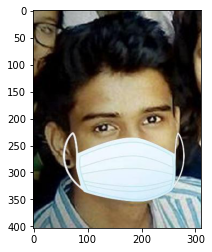

In [10]:
img = mpimg.imread('./face-mask-dataset/data/with_mask/with_mask_1000.jpg')
imgplot = plt.imshow(img)

### Image Processing

1. Resizing the Image

2. Convert the image to numpy arrays

In [11]:
with_mask_path = r'./face-mask-dataset/data/with_mask/'

data = []

for img_file in with_mask:
    
    
    image = Image.open(with_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
len(data)

C:\Users\tanis\anaconda3\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


3725

In [12]:
without_mask_path = './face-mask-dataset/data/without_mask/'
for img_file in without_mask:
    
    
    image = Image.open(without_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
len(data)

7553

In [13]:
print(data[0:10])

[array([[[50, 58, 31],
        [46, 54, 34],
        [56, 59, 42],
        ...,
        [26, 32, 25],
        [29, 33, 18],
        [34, 40, 16]],

       [[47, 55, 30],
        [49, 57, 37],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [38, 42, 31],
        [31, 41, 22]],

       [[52, 58, 37],
        [50, 59, 38],
        [59, 64, 36],
        ...,
        [45, 44, 30],
        [29, 35, 28],
        [20, 30, 17]],

       ...,

       [[63, 72, 37],
        [66, 76, 41],
        [74, 84, 50],
        ...,
        [ 5,  4,  0],
        [20, 19, 15],
        [17, 17, 12]],

       [[59, 71, 34],
        [60, 70, 39],
        [68, 76, 50],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 29],
        [54, 64, 37],
        [57, 63, 43],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [20, 12, 13]]], dtype=uint8), array([[[115,  61,  15],
        [121,  65,  18],
        [129,  73,  26],
        ...,
  

In [14]:
data[0].shape

(128, 128, 3)

In [15]:
# converting  image list and labels as numpy array

X = np.array(data)
y = np.array(labels)

print(X.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


### Train-test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=2)

In [17]:
print(y_train.shape, X_train.shape)

(6042,) (6042, 128, 128, 3)


#### Scaling the Data


In [18]:
X_train_scaled = X_train / 255 ## Scaling val between [0, 1]
X_test_scaled = X_test / 255

In [19]:
X_train_scaled[0]

array([[[0.88235294, 0.92156863, 0.77647059],
        [0.82352941, 0.84705882, 0.72941176],
        [0.74117647, 0.7372549 , 0.6627451 ],
        ...,
        [0.73333333, 0.71372549, 0.64705882],
        [0.70980392, 0.68235294, 0.59215686],
        [0.64705882, 0.71372549, 0.52156863]],

       [[0.87843137, 0.89411765, 0.85098039],
        [0.79215686, 0.8       , 0.76470588],
        [0.78823529, 0.78039216, 0.75686275],
        ...,
        [0.77647059, 0.74509804, 0.70588235],
        [0.69411765, 0.6627451 , 0.60392157],
        [0.61960784, 0.71372549, 0.55294118]],

       [[0.80392157, 0.8       , 0.83921569],
        [0.86666667, 0.85882353, 0.89019608],
        [0.76470588, 0.74901961, 0.77254902],
        ...,
        [0.71764706, 0.67843137, 0.68235294],
        [0.68235294, 0.64705882, 0.62745098],
        [0.68235294, 0.79607843, 0.65098039]],

       ...,

       [[0.60784314, 0.69019608, 0.78039216],
        [0.62745098, 0.70588235, 0.77254902],
        [0.64705882, 0

### Building a Convolutional Neural Network

In [20]:
import tensorflow as tf
from tensorflow import keras

In [21]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [22]:
# Compiling the NN

model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['acc'])

In [23]:
# Training The Model
history = model.fit(X_train_scaled, y_train, validation_split=0.10, epochs=10)

Epoch 1/10
170/170 [==============================] - 229s 1s/step - loss: 0.4812 - acc: 0.7763 - val_loss: 0.2993 - val_acc: 0.8678
Epoch 2/10
170/170 [==============================] - 234s 1s/step - loss: 0.2866 - acc: 0.8898 - val_loss: 0.2550 - val_acc: 0.8926
Epoch 3/10
170/170 [==============================] - 231s 1s/step - loss: 0.2292 - acc: 0.9077 - val_loss: 0.2044 - val_acc: 0.9256
Epoch 4/10
170/170 [==============================] - 226s 1s/step - loss: 0.2024 - acc: 0.9242 - val_loss: 0.2661 - val_acc: 0.8926
Epoch 5/10
170/170 [==============================] - 235s 1s/step - loss: 0.1673 - acc: 0.9354 - val_loss: 0.2310 - val_acc: 0.9355
Epoch 6/10
170/170 [==============================] - 221s 1s/step - loss: 0.1522 - acc: 0.9432 - val_loss: 0.2045 - val_acc: 0.9372
Epoch 7/10
170/170 [==============================] - 224s 1s/step - loss: 0.1116 - acc: 0.9559 - val_loss: 0.2212 - val_acc: 0.9405
Epoch 8/10
170/170 [==============================] - 223s 1s/step - 

### Model Evaluation

In [24]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy}')



48/48 [==============================] - 14s 301ms/step - loss: 0.2451 - acc: 0.9338
Test Accuracy: 0.9338186383247375


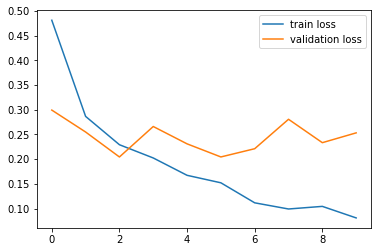

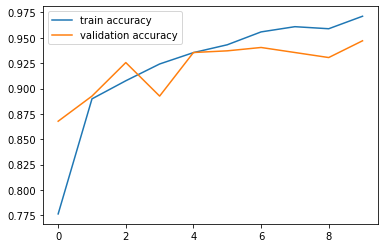

In [25]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

### Predictive System

In [27]:


input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

# cv2.imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)



if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')


Path of the image to be predicted: C:\Users\tanis\Downloads\test2.jpg
1/1 [==============================] - 0s 172ms/step
[[0.01912979 0.9955218 ]]
1
The person in the image is wearing a mask
